In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
data = pd.read_csv(r"C:\Users\91900\Desktop\telecom.csv")
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [157]:
import plotly.graph_objs as go
import plotly.offline as po

# Visualization of Total Customer Churn

churn_labels = data["Churn"].value_counts().keys().tolist()
churn_values = data["Churn"].value_counts().values.tolist()

plot_data= [go.Pie(labels = churn_labels,values = churn_values,marker = dict(colors = [ 'yello', 'Ivory'],line = dict(color = "white",width = 1.5)),rotation = 90,hoverinfo = "label+value+text",hole = .6)]

# Total Number of Customers that will churn
count_churn_yes = data[data.Churn == 'Yes'].shape[0]
# Total Number of Customers that will not churn
count_churn_no = data[data.Churn == 'No'].shape[0]

# Percentage of customer that will churn
percent_churn_yes = round((count_churn_yes / (count_churn_yes + count_churn_no) * 100),2)
# Percentage of customer that will not churn (retain)
percent_churn_no = round((count_churn_no / (count_churn_yes + count_churn_no) * 100 ),2)


plot_layout = go.Layout(dict(title = f'{percent_churn_yes}% ({count_churn_yes} number) of the customers will churn & {percent_churn_no}% ({count_churn_no} number) of the customers will retain',
                             plot_bgcolor = "rgb(243,243,243)",
                             paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [158]:
df = pd.DataFrame(data)

In [159]:
# drop all rows with any NaN and NaT values
data = df.dropna()

In [160]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [161]:
# Calculate the missing value counts for each column
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0.5, 1.0, 'Gender and Customer Churn connection')

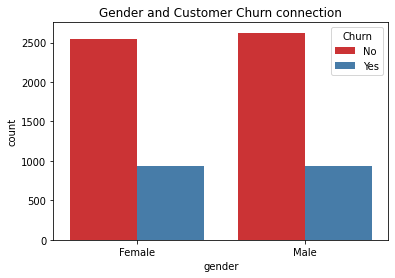

In [162]:
ax = sns.countplot(x='gender', hue='Churn', data=data, palette="Set1")
ax.set_title('Gender and Customer Churn connection')

Text(0.5, 1.0, 'SeniorCitizens have higher customer churn')

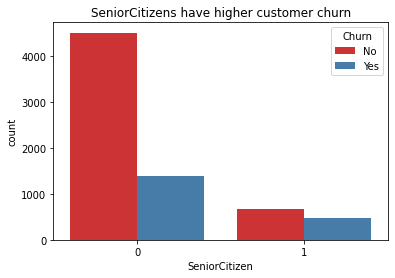

In [163]:
ax = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=data, palette="Set1")
ax.set_title(f'SeniorCitizens have higher customer churn')

Text(0.5, 1.0, 'Effect of internet service on customer churn')

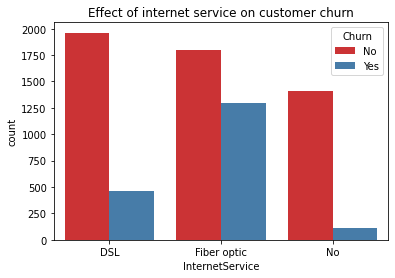

In [164]:
ax = sns.countplot(x= 'InternetService', hue='Churn', data=data, palette="Set1")
ax.set_title(f'Effect of internet service on customer churn')

c:\users\91900\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



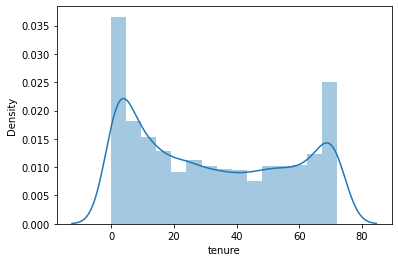

In [165]:
ax = sns.distplot(data['tenure'])

c:\users\91900\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



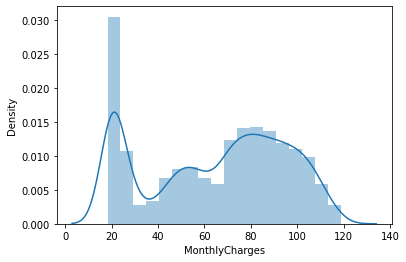

In [166]:
ax=sns.distplot(data['MonthlyCharges']);

Text(0.5, 1.0, 'Contract')

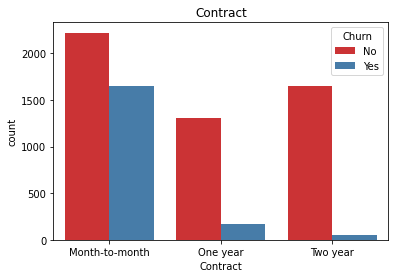

In [167]:
ax = sns.countplot(x= 'Contract', hue='Churn', data=data, palette="Set1")
ax.set_title(f'Contract')

Text(0.5, 0, '0-No, 1-Yes')

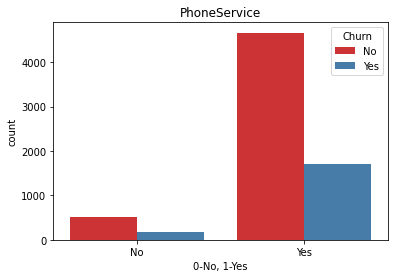

In [168]:
ax = sns.countplot(x= 'PhoneService', hue='Churn', data=data, palette="Set1")
ax.set_title(f'PhoneService')
plt.xlabel('0-No, 1-Yes')

Text(0.5, 0, '0-No, 1-Yes')

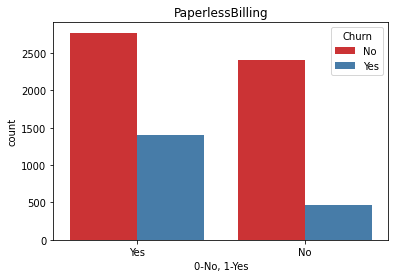

In [169]:
ax = sns.countplot(x= 'PaperlessBilling', hue='Churn', data=data, palette="Set1")
ax.set_title(f'PaperlessBilling')
plt.xlabel('0-No, 1-Yes')

In [170]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# Checking its datatype
data['TotalCharges'].dtypes

c:\users\91900\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dtype('float64')

In [171]:
# Hence, we will remove 'TotalCharges' from the dataframe

data.drop('TotalCharges', axis=1, inplace=True)

# Checking whether 'TotalCharges' has been removed
data.head()

c:\users\91900\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,Yes


In [172]:
#dropping insignificant attributes
x = data.drop('customerID', axis = 'columns')

x=data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No', 1:'Yes'})
x=data['Churn'] = data['Churn'].map({'No':0, 'Yes':1})
# Droppinig customerID
# Replacing 1/0 in 'seniorCitizen' with Yes/No
# Replacing Yes/No in the target variable (Churn) with 1/0

c:\users\91900\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\91900\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [173]:
# Checking whether we have any missing values

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [174]:
# Converting tenure into smaller buckets
bins = [0,6,12,18,24,36,48,60,72,84]
data['Tenure_grouped'] = pd.cut(data['tenure'], bins)
data.head()

c:\users\91900\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure_grouped
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,"(0, 6]"
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,0,"(24, 36]"
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,"(0, 6]"
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,"(36, 48]"
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1,"(6, 12]"


In [175]:
# Removing the continuous version of tenure

data.drop('tenure', axis=1, inplace=True)
data.head()

c:\users\91900\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure_grouped
0,7590-VHVEG,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,"(0, 6]"
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,"(24, 36]"
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,"(0, 6]"
3,7795-CFOCW,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,"(36, 48]"
5,9305-CDSKC,Female,No,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1,"(6, 12]"


In [176]:
df_dummy = pd.get_dummies(data, drop_first=True)
df_dummy.head()
df_churn_model = df_dummy
df_churn_model.head()

,MonthlyCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,"Tenure_grouped_(6, 12]","Tenure_grouped_(12, 18]","Tenure_grouped_(18, 24]","Tenure_grouped_(24, 36]","Tenure_grouped_(36, 48]","Tenure_grouped_(48, 60]","Tenure_grouped_(60, 72]","Tenure_grouped_(72, 84]"
0,29.85,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,56.95,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,53.85,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,42.30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,99.65,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [177]:
from sklearn.model_selection import train_test_split
y = df_churn_model['Churn']
X = df_churn_model.drop('Churn', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [179]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

c:\users\91900\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

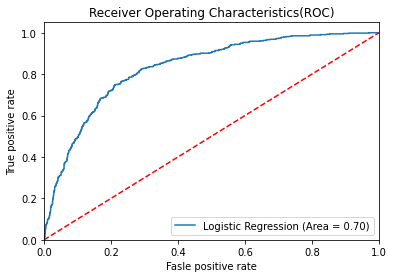

In [180]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_logreg = logreg.predict(X_test)

logreg_roc_auc = roc_auc_score(y_test,y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logreg_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristics(ROC)')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

In [181]:
from sklearn.metrics import confusion_matrix
confusion_matrix_logreg = confusion_matrix(y_test,y_pred_logreg)
confusion_matrix_logreg

array([[1419,  158],
       [ 271,  265]], dtype=int64)

In [182]:
from sklearn.metrics import classification_report
classify_logreg = classification_report(y_test, y_pred_logreg)
print(classify_logreg)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1577
           1       0.63      0.49      0.55       536

    accuracy                           0.80      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



AxesSubplot(0.125,0.125;0.775x0.755)


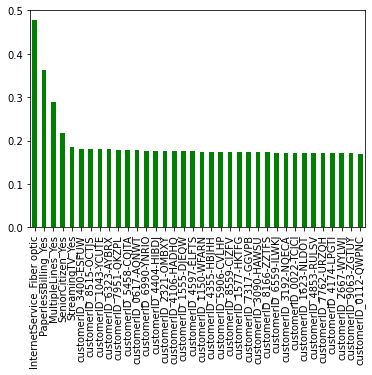

In [183]:
# Weights of the variables

logweights = pd.Series(logreg.coef_[0], index=X.columns.values)
weight_logreg = logweights.sort_values(ascending = False)[:36].plot(kind='bar', color='green')
print (weight_logreg)

In [184]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier()

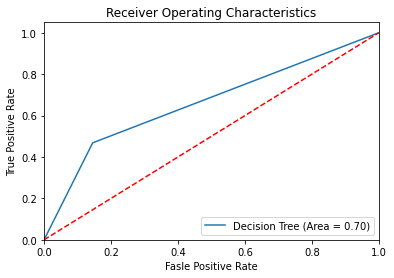

In [185]:
y_pred_dectree = dectree.predict(X_test)

dectree_roc_auc = roc_auc_score(y_test,y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test,dectree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.2f)' % dectree_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('DEC_ROC')
plt.show()

In [186]:
confusion_matrix_dectree = confusion_matrix(y_test,y_pred_dectree)
confusion_matrix_dectree

array([[1348,  229],
       [ 285,  251]], dtype=int64)

In [187]:
classify_dectree = classification_report(y_test, y_pred_dectree)
print(classify_dectree)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1577
           1       0.52      0.47      0.49       536

    accuracy                           0.76      2113
   macro avg       0.67      0.66      0.67      2113
weighted avg       0.75      0.76      0.75      2113



In [188]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators=100, random_state=0)
ranfor.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

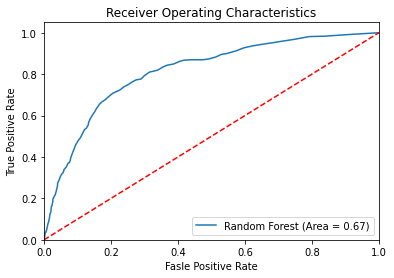

In [189]:
y_pred_ranfor = ranfor.predict(X_test)
ranfor_roc_auc = roc_auc_score(y_test,y_pred_ranfor)
fpr, tpr, thresholds = roc_curve(y_test,ranfor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (Area = %0.2f)' % ranfor_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [190]:
confusion_matrix_ranfor = confusion_matrix(y_test,y_pred_ranfor)
confusion_matrix_ranfor

array([[1443,  134],
       [ 311,  225]], dtype=int64)

In [191]:
classify_ranfor = classification_report(y_test, y_pred_ranfor)
print(classify_ranfor)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1577
           1       0.63      0.42      0.50       536

    accuracy                           0.79      2113
   macro avg       0.72      0.67      0.68      2113
weighted avg       0.77      0.79      0.77      2113



In [192]:
# K Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

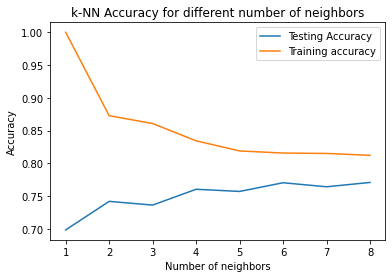

In [193]:
plt.title('k-NN Accuracy for different number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [194]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

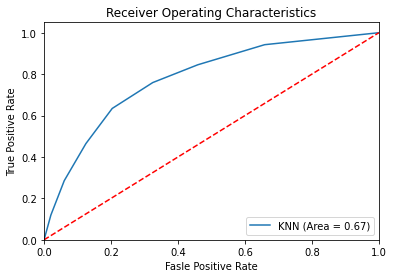

In [195]:
y_pred_knn = knn.predict(X_test)

knn_roc_auc = roc_auc_score(y_test,y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.2f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [196]:
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)
confusion_matrix_knn

array([[1380,  197],
       [ 287,  249]], dtype=int64)

In [197]:
classify_knn = classification_report(y_test, y_pred_knn)
print(classify_knn)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1577
           1       0.56      0.46      0.51       536

    accuracy                           0.77      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



In [198]:
# Comparing performance of the 4 models

performance = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Nearest Neighbors'], 
               'Accuracy (%)': [80, 72,78, 77], 
               'Sensitivity (%)': [52, 49, 47, 48], 
               'Specificity (%)': [91, 81, 89, 87]
              }
perf = pd.DataFrame(data=performance)
perf

,Model,Accuracy (%),Sensitivity (%),Specificity (%)
0,Logistic Regression,80,52,91
1,Decision Tree,72,49,81
2,Random Forest,78,47,89
3,K Nearest Neighbors,77,48,87


In [199]:
perf = perf.set_index('Model')

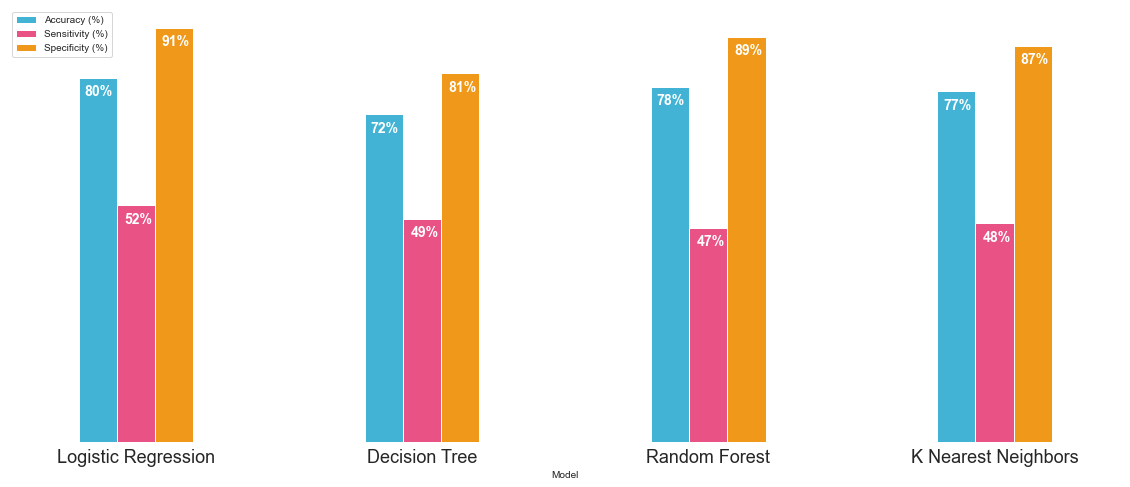

In [200]:
sns.set_style(style='white')

ax = perf.plot(kind='bar', figsize=(20,8), width=0.4, color=['#42b3d5', '#e85285', '#f09819'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

ax.get_yaxis().set_visible(False)

for n in range(3):
    for index, val in enumerate(perf.iloc[:,n].transpose()): 
        label=str(val) + '%'
        
        if n==0:
            ax.annotate(label, xy=(index - 0.18, val-4), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index - 0.04, val-4), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==2:
            ax.annotate(label, xy=(index + 0.09, val-4), color='#ffffff', fontsize=14, fontweight='bold')